In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rarfile
!pip install unrar


In [3]:
import rarfile

# Path to the .rar file
rar_file = '/content/drive/MyDrive/dataset6k.rar'

# Open and extract the .rar file to the same location
with rarfile.RarFile(rar_file) as rf:
    rf.extractall()  # This extracts the contents to the current working directory

print(f"Dataset extracted to the current directory.")

Dataset extracted to the current directory.


In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
! python3 -m pip install --no-cache-dir xformers transformers[torch] ftfy datasets tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 235.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 235.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 336.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 291.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 304.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 272.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 291.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompati

In [7]:
! accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [9]:
import pandas as pd

# Load the CSV file
csv_path = "/content/dataset6k/metadata.csv"  # Update the path if necessary
metadata = pd.read_csv(csv_path)

# Display the first few rows to inspect its structure
metadata.head()

,Image Filename,Sketch Filename,Text Description
0,0.jpg,0.jpg,"The person has big lips, wavy hair, arched eye..."
1,1.jpg,1.jpg,"This person has arched eyebrows, wavy hair, an..."
2,10.jpg,10.jpg,"This man is chubby and has oval face, big nose..."
3,100.jpg,100.jpg,"This person is attractive and has wavy hair, b..."
4,1000.jpg,1000.jpg,"This man has double chin, bags under eyes, big..."


In [10]:
print("Columns in CSV:", metadata.columns)

Columns in CSV: Index(['Image Filename', 'Sketch Filename', 'Text Description'], dtype='object')


In [11]:
import os
import pandas as pd

# Paths to folders
base_sketch_path = "/content/dataset6k/sketches"
base_image_path = "/content/dataset6k/images"

# Load the CSV
csv_path = "/content/dataset6k/metadata.csv"
metadata = pd.read_csv(csv_path)

# Add full paths for sketches and images
metadata["sketch_file"] = metadata["Sketch Filename"].apply(lambda x: os.path.join(base_sketch_path, x))
metadata["face_file"] = metadata["Image Filename"].apply(lambda x: os.path.join(base_image_path, x))

# Inspect the updated DataFrame
metadata.head()

,Image Filename,Sketch Filename,Text Description,sketch_file,face_file
0,0.jpg,0.jpg,"The person has big lips, wavy hair, arched eye...",/content/dataset6k/sketches/0.jpg,/content/dataset6k/images/0.jpg
1,1.jpg,1.jpg,"This person has arched eyebrows, wavy hair, an...",/content/dataset6k/sketches/1.jpg,/content/dataset6k/images/1.jpg
2,10.jpg,10.jpg,"This man is chubby and has oval face, big nose...",/content/dataset6k/sketches/10.jpg,/content/dataset6k/images/10.jpg
3,100.jpg,100.jpg,"This person is attractive and has wavy hair, b...",/content/dataset6k/sketches/100.jpg,/content/dataset6k/images/100.jpg
4,1000.jpg,1000.jpg,"This man has double chin, bags under eyes, big...",/content/dataset6k/sketches/1000.jpg,/content/dataset6k/images/1000.jpg


In [12]:
from datasets import Dataset

# Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(metadata)

# Inspect the dataset
print(hf_dataset)
print(hf_dataset[0])  # First example

Dataset({
    features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
    num_rows: 6000
})
{'Image Filename': '0.jpg', 'Sketch Filename': '0.jpg', 'Text Description': 'The person has big lips, wavy hair, arched eyebrows, high cheekbones, bags under eyes, brown hair, mouth slightly open, and pointy nose. She is wearing heavy makeup.', 'sketch_file': '/content/dataset6k/sketches/0.jpg', 'face_file': '/content/dataset6k/images/0.jpg'}


In [13]:
from datasets import DatasetDict

# Split the dataset (80% train, 20% test)
split_dataset = hf_dataset.train_test_split(test_size=0.1, seed=42)

# Create a DatasetDict
final_dataset = DatasetDict({
    "train": split_dataset["train"],
    "test": split_dataset["test"],
})

# Inspect the splits
print("Train examples:", len(final_dataset["train"]))
print("Test examples:", len(final_dataset["test"]))

Train examples: 5400
Test examples: 600


In [14]:
# Save the dataset to disk
output_path = "./processed_dataset"
final_dataset.save_to_disk(output_path)

print(f"Dataset saved to {output_path}")

Saving the dataset (0/1 shards):   0%|          | 0/5400 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/600 [00:00<?, ? examples/s]

Dataset saved to ./processed_dataset


In [15]:
! export BASE_MODEL=stabilityai/stable-diffusion-1-5
! export DATASET=./processed_subset_dataset
! export TUNED_MODEL=./tuned_model

In [16]:
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 9.4 MB/s eta 0:00:00


In [17]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-03vvdbq1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-03vvdbq1
  Resolved https://github.com/huggingface/diffusers.git to commit 2be66e6aa097ec9006d98e31c41f2e867cf6683a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2991447 sha256=209b94de3edbfb250247d727647d99b9b38afa5cb8303c7a65ea9fdb88e13eda
  Stored in directory: /tmp/pip-ephem-wheel-cache-qorg1q42/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [18]:
%env TF_ENABLE_ONEDNN_OPTS=0

env: TF_ENABLE_ONEDNN_OPTS=0


In [19]:
from datasets import load_from_disk
dataset = load_from_disk('./processed_dataset')
print(dataset['train'][0])  # Replace 'train' with the correct split if necessary

{'Image Filename': '10467.jpg', 'Sketch Filename': '10467.jpg', 'Text Description': 'The person has wavy hair.', 'sketch_file': '/content/dataset6k/sketches/10467.jpg', 'face_file': '/content/dataset6k/images/10467.jpg'}


In [20]:
import os

missing_sketches = metadata[~metadata["sketch_file"].apply(os.path.exists)]
missing_faces = metadata[~metadata["face_file"].apply(os.path.exists)]

print(f"Missing sketches: {len(missing_sketches)}")
print(f"Missing faces: {len(missing_faces)}")

if not missing_sketches.empty:
    print(missing_sketches.head())

if not missing_faces.empty:
    print(missing_faces.head())


Missing sketches: 0
Missing faces: 0


In [ ]:
! accelerate launch --mixed_precision="fp16" \
    ./train_instruct_pix2pix-1.py \
    --pretrained_model_name_or_path=stable-diffusion-v1-5/stable-diffusion-v1-5 \
    --train_data_dir=./processed_subset_dataset \
    --output_dir=./tuned_model \
    --resolution=512 \
    --train_batch_size=2 \
    --gradient_accumulation_steps=4 \
    --gradient_checkpointing \
    --max_train_steps=1000 \
    --checkpointing_steps=100 \
    --checkpoints_total_limit=2 \
    --learning_rate=5e-05 \
    --max_grad_norm=1.0 \
    --lr_warmup_steps=50 \
    --conditioning_dropout_prob=0.1 \
    --seed=42 \
    --enable_xformers_memory_efficient_attention \
    --report_to=tensorboard \
    --original_image_column="sketch_file" \
    --edit_prompt_column="description" \
    --edited_image_column="face_file"

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/tuned_model"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
from PIL import Image



In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.8, guidance_scale=30).images

# Save the generated image
images[0].save("OUTPUT1.png")

In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.4, guidance_scale=25).images

# Save the generated image
images[0].save("OUTPUT1.png")

TRYING INSTRUCT PIX TO PIX

In [21]:
! accelerate launch --mixed_precision="fp16" \
    ./train_instruct_pix2pix-1.py \
    --pretrained_model_name_or_path=timbrooks/instruct-pix2pix \
    --train_data_dir=./processed_dataset \
    --output_dir=./tuned_model_pixtopix \
    --resolution=512 \
    --train_batch_size=2 \
    --gradient_accumulation_steps=4 \
    --gradient_checkpointing \
    --max_train_steps=3000 \
    --checkpointing_steps=100 \
    --checkpoints_total_limit=2 \
    --learning_rate=5e-05 \
    --max_grad_norm=1.0 \
    --lr_warmup_steps=50 \
    --conditioning_dropout_prob=0.1 \
    --seed=42 \
    --enable_xformers_memory_efficient_attention \
    --report_to=tensorboard \
    --original_image_column="sketch_file" \
    --edit_prompt_column="Text Description" \
    --edited_image_column="face_file"

2024-12-03 18:56:39.667139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 18:56:39.687958: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 18:56:39.694445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 18:56:39.709830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 18:56:40.787563: W ten

In [22]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/tuned_model_pixtopix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

from PIL import Image



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
from PIL import Image

# Load and convert the input image to RGB
image_path = "/content/dataset6k/sketches/0.jpg"
input_image = Image.open(image_path).convert("RGB")

# Run the pipeline
prompt = "The person has big lips, wavy hair, arched eyebrows, high cheekbones, bags under eyes, brown hair, mouth slightly open, and pointy nose. She is wearing heavy makeup."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.4, guidance_scale=7).images

# Save the generated image
images[0].save("OUTPUT1.png")


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

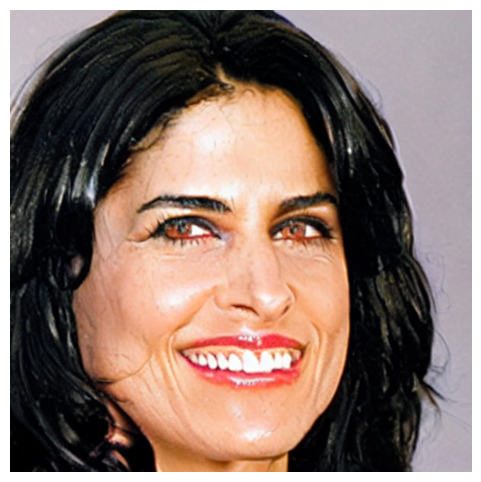

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the input image to RGB
image_path = "/content/3.jpg"
input_image = Image.open(image_path).convert("RGB")

# Run the pipeline (assumed that 'pipe' is already defined and set up)
prompt = "The woman has black hair, big nose, mouth slightly open, wavy hair, and bushy eyebrows. She is young, and smiling and wears lipstick."
pipe.safety_checker = None

# Generate images using the pipeline
images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=10).images

# Display the generated image inline in the notebook
plt.figure(figsize=(6, 6))
plt.imshow(images[0])
plt.axis('off')  # Hide axes
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

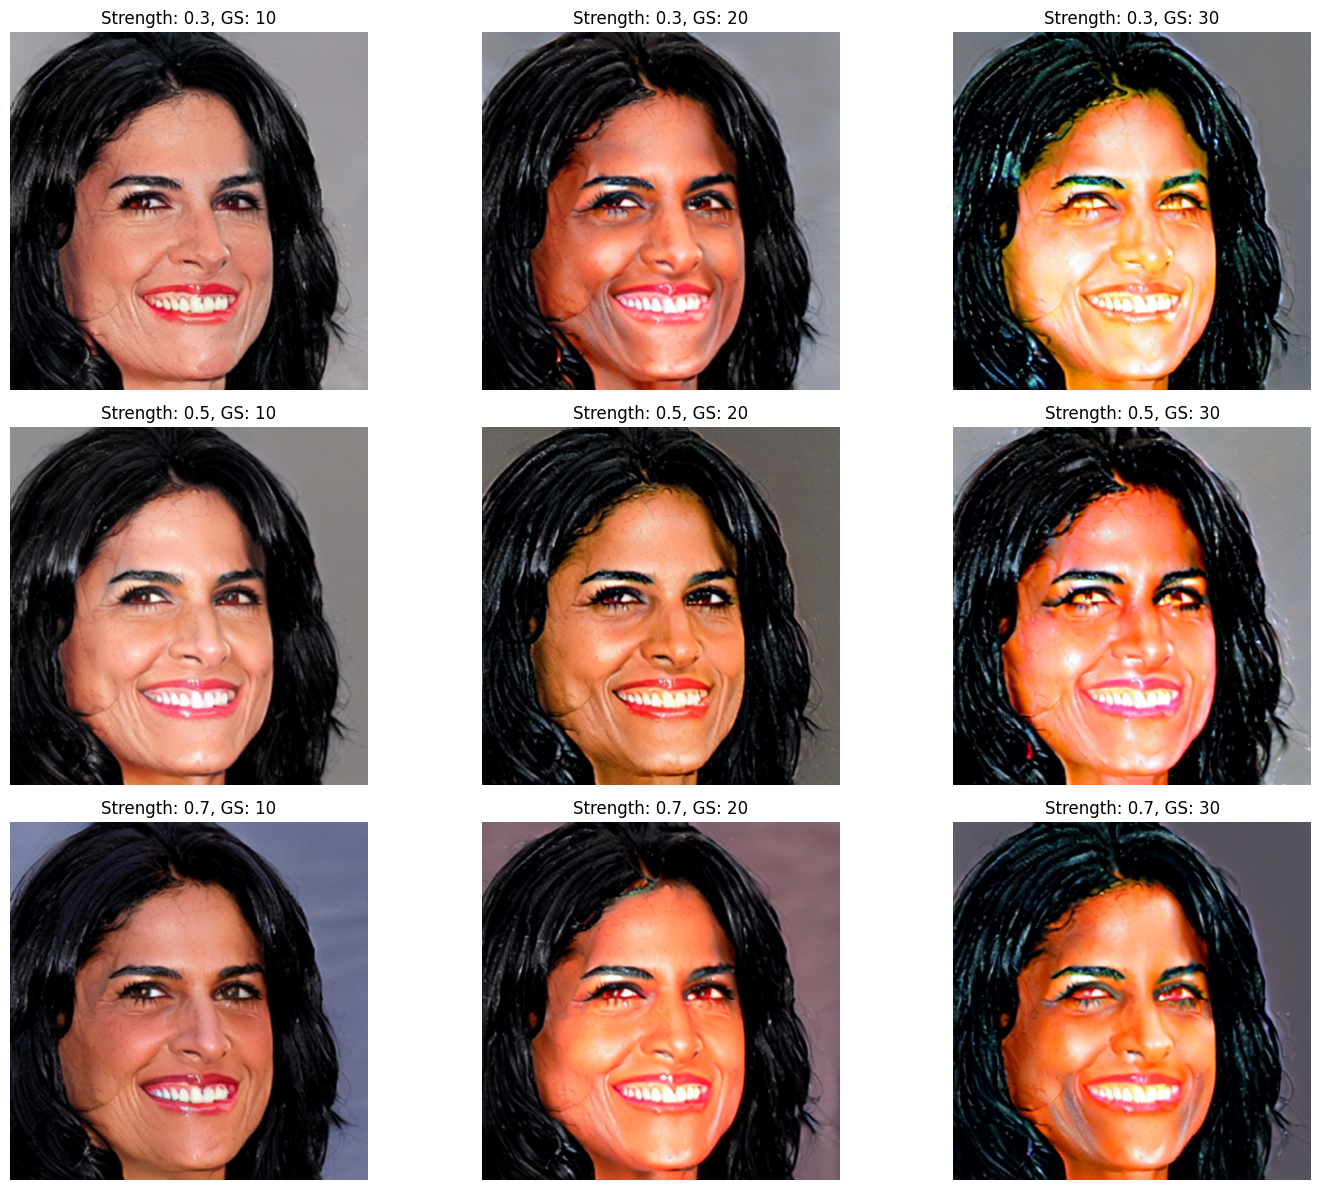

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the input image to RGB
image_path = "/content/3.jpg"
input_image = Image.open(image_path).convert("RGB")

# Define the prompt
prompt = "The woman has black hair, big nose, mouth slightly open, wavy hair, and bushy eyebrows. She is young, and smiling and wears lipstick."

# Hyperparameters to test
strength_values = [0.3, 0.5, 0.7]
guidance_scale_values = [10, 20, 30]

# Create a figure to display the images
fig, axes = plt.subplots(len(strength_values), len(guidance_scale_values), figsize=(15, 12))

# Loop over combinations of strength and guidance_scale
for i, strength in enumerate(strength_values):
    for j, guidance_scale in enumerate(guidance_scale_values):
        # Run the pipeline with the current combination of hyperparameters
        pipe.safety_checker = None
        images = pipe(prompt=prompt, image=input_image, strength=strength, guidance_scale=guidance_scale).images

        # Display the image for the current hyperparameter combination
        ax = axes[i, j]
        ax.imshow(images[0])
        ax.axis('off')  # Hide axes
        ax.set_title(f"Strength: {strength}, GS: {guidance_scale}")

# Adjust layout and display the images
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image

# Load and convert the input image to RGB
image_path = "/content/327_sk.jpg"
input_image = Image.open(image_path).convert("RGB")  # Convert to 3-channel RGB

# Run the pipeline
prompt = "A young woman with an oval shaped face. Her hair is black and curly and she's got a fringe. Her eyes are blue and there is some black makeup around them. Her lips are full and they are painted red. Her lips are slightly parted and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.3, guidance_scale=15).images

# Save the generated image
images[0].save("OUTPUT1.png")


In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/drive/MyDrive/tuned_model"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

from PIL import Image



In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=50).images

# Save the generated image
images[0].save("OUTPUT1.png")

In [ ]:
# Load the image properly
image_path = "/content/29.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A woman with high cheekbones, a defined jawline and a small nose. She has full lips and light green eyes. She has blonde hair and is wearing makeup."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.4, guidance_scale=25).images

# Save the generated image
images[0].save("OUTPUT1.png")

In [ ]:
# Load the image properly
image_path = "/content/subset_images/subset_sketches/657.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A man with large cheeks, thin lips and a long nose."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=30).images

# Save the generated image
images[0].save("OUTPUT1.png")

In [ ]:
!zip -r tuned_model_pixtopix.zip tuned_model_pixtopix



In [ ]:
from google.colab import files
files.download('tuned_model_pixtopix.zip')


In [30]:
import shutil

# Define source and destination paths
source_path = '/content/tuned_model_pixtopix'
destination_path = '/content/drive/My Drive/tuned_model_final_2.0'

# Copy the directory to Google Drive
shutil.copytree(source_path, destination_path)
print("Model copied to Google Drive.")


Model copied to Google Drive.


In [ ]:
from diffusers import UNet2DConditionModel
from peft import PeftModel

# Path to your LoRA checkpoint directory
checkpoint_path = "./tuned_model/checkpoint-1000"

# Reload the base UNet model
unet = UNet2DConditionModel.from_pretrained(checkpoint_path)

# Reload the LoRA modifications (if they were applied during training)
unet = PeftModel.from_pretrained(unet, checkpoint_path)

# Now you can save the LoRA weights
output_dir = "./tuned_model/peft_lora_weights"
unet.save_pretrained(output_dir)
print(f"LoRA weights saved to {output_dir}")


In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline

# Load the original model
base_model_id = "radames/stable-diffusion-v1-5-img2img"
base_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)

# Load your fine-tuned model
fine_tuned_model_id = "./tuned_model"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(fine_tuned_model_id, torch_dtype=torch.float16)

# Replace missing components
pipe.unet = base_pipe.unet

# Move to GPU
pipe = pipe.to("cuda")

# Test inference
from PIL import Image

input_image = Image.open("input_image.png").convert("RGB")
prompt = "A woman with high cheekbones, a defined jawline and a small nose. She has full lips and light green eyes. She has blonde hair and is wearing makeup."
output = pipe(prompt=prompt, image=input_image, strength=0.75, guidance_scale=7.5)
output.images[0].save("29_output.png")


In [ ]:
from datasets import load_from_disk

# Load the dataset from disk
loaded_dataset = load_from_disk(output_path)

# Inspect the loaded dataset
print("Loaded Dataset:")
print(loaded_dataset)
print("Train examples:", len(loaded_dataset["train"]))
print("Test examples:", len(loaded_dataset["test"]))


In [ ]:
from datasets import load_from_disk

dataset = load_from_disk("./processed_subset_dataset")


In [ ]:
ls ./processed_subset_dataset


In [ ]:
# Inspect the dataset to ensure it loaded correctly
print(dataset)
print("Train samples:", len(dataset["train"]))
print("Test samples:", len(dataset["test"]))

In [ ]:
import os
dataset = load_from_disk("./processed_subset_dataset")

for row in dataset["train"]:
    assert os.path.exists(row["sketch_file"]), f"Missing file: {row['sketch_file']}"
    assert os.path.exists(row["face_file"]), f"Missing file: {row['face_file']}"


In [ ]:
print("Train dataset size:", len(split_dataset["train"]))
print("Test dataset size:", len(split_dataset["test"]))


In [ ]:
from datasets import load_from_disk

dataset_path = "./processed_subset_dataset"
dataset = load_from_disk(dataset_path)

# Check the structure
print(dataset)

# Inspect the "train" split
print("Train dataset size:", len(dataset["train"]))
print("Columns in the train dataset:", dataset["train"].column_names)

# Print a few examples from the "train" split
print(dataset["train"][0])


In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(args.train_data_dir)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
